In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

df = pd.read_csv('train.csv', header=0)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# Convert ordinal categorical data to numeric types
quality = {v: k for k, v in enumerate(['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'])}
quality_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu',
                'GarageQual', 'GarageCond', 'PoolQC']
df.replace({c: quality for c in quality_cols}, inplace=True)

rating = {v: k for k, v in enumerate(['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'])}
df.replace({c: rating for c in ['BsmtFinType1', 'BsmtFinType2']}, inplace=True)

df.replace({'BsmtExposure': {v: k for k, v in enumerate(['NA', 'No', 'Mn', 'Av', 'Gd'])}}, inplace=True)
df.replace({'Functional': {v: k for k, v in
                           enumerate(['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'])}}, inplace=True)
df.replace({'GarageFinish': {v: k for k, v in enumerate(['NA', 'Unf', 'RFn', 'Fin'])}}, inplace=True)
df.replace({'PavedDrive': {v: k for k, v in enumerate(['N', 'P', 'Y'])}}, inplace=True)

cols_cat_num = quality_cols + ['BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'Functional', 'GarageFinish',
                               'PavedDrive']
for name in cols_cat_num:
    df[name] = pd.to_numeric(df[name])
df[cols_cat_num].info()
df[cols_cat_num].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 16 columns):
ExterQual       1460 non-null int64
ExterCond       1460 non-null int64
BsmtQual        1423 non-null float64
BsmtCond        1423 non-null float64
HeatingQC       1460 non-null int64
KitchenQual     1460 non-null int64
FireplaceQu     770 non-null float64
GarageQual      1379 non-null float64
GarageCond      1379 non-null float64
PoolQC          7 non-null float64
BsmtFinType1    1423 non-null float64
BsmtFinType2    1422 non-null float64
BsmtExposure    1422 non-null float64
Functional      1460 non-null int64
GarageFinish    1379 non-null float64
PavedDrive      1460 non-null int64
dtypes: float64(10), int64(6)
memory usage: 182.6 KB


,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC,BsmtFinType1,BsmtFinType2,BsmtExposure,Functional,GarageFinish,PavedDrive
0,4,3,4.0,3.0,5,4,NaN,3.0,3.0,NaN,6.0,1.0,1.0,7,2.0,2
1,3,3,4.0,3.0,5,3,3.0,3.0,3.0,NaN,5.0,1.0,4.0,7,2.0,2
2,4,3,4.0,3.0,5,4,3.0,3.0,3.0,NaN,6.0,1.0,2.0,7,2.0,2
3,3,3,3.0,4.0,4,4,4.0,3.0,3.0,NaN,5.0,1.0,1.0,7,1.0,2
4,4,3,4.0,3.0,5,4,3.0,3.0,3.0,NaN,6.0,1.0,3.0,7,2.0,2


In [2]:
# ALTERNATIVE TO ABOVE CELL:
# Convert ordinal categorical data to categorical type
cols_cat_ord = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu',
                'GarageQual', 'GarageCond', 'PoolQC', 'BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'Functional',
                'GarageFinish', 'PavedDrive']
for name in cols_cat_ord:
    df[name] = df[name].astype('category')
df[cols_cat_ord].info()
df[cols_cat_ord].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 16 columns):
ExterQual       1460 non-null category
ExterCond       1460 non-null category
BsmtQual        1423 non-null category
BsmtCond        1423 non-null category
HeatingQC       1460 non-null category
KitchenQual     1460 non-null category
FireplaceQu     770 non-null category
GarageQual      1379 non-null category
GarageCond      1379 non-null category
PoolQC          7 non-null category
BsmtFinType1    1423 non-null category
BsmtFinType2    1422 non-null category
BsmtExposure    1422 non-null category
Functional      1460 non-null category
GarageFinish    1379 non-null category
PavedDrive      1460 non-null category
dtypes: category(16)
memory usage: 23.5 KB


,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC,BsmtFinType1,BsmtFinType2,BsmtExposure,Functional,GarageFinish,PavedDrive
0,Gd,TA,Gd,TA,Ex,Gd,NaN,TA,TA,NaN,GLQ,Unf,No,Typ,RFn,Y
1,TA,TA,Gd,TA,Ex,TA,TA,TA,TA,NaN,ALQ,Unf,Gd,Typ,RFn,Y
2,Gd,TA,Gd,TA,Ex,Gd,TA,TA,TA,NaN,GLQ,Unf,Mn,Typ,RFn,Y
3,TA,TA,TA,Gd,Gd,Gd,Gd,TA,TA,NaN,ALQ,Unf,No,Typ,Unf,Y
4,Gd,TA,Gd,TA,Ex,Gd,TA,TA,TA,NaN,GLQ,Unf,Av,Typ,RFn,Y


In [3]:
# Convert non-ordinal categorical data to categorical type
cols_cat = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
            'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
            'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir',
            'Electrical', 'GarageType', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'MoSold']
for name in cols_cat:
    df[name] = df[name].astype('category')
df[cols_cat].info()
df[cols_cat].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 29 columns):
MSSubClass       1460 non-null category
MSZoning         1460 non-null category
Street           1460 non-null category
Alley            91 non-null category
LotShape         1460 non-null category
LandContour      1460 non-null category
Utilities        1460 non-null category
LotConfig        1460 non-null category
LandSlope        1460 non-null category
Neighborhood     1460 non-null category
Condition1       1460 non-null category
Condition2       1460 non-null category
BldgType         1460 non-null category
HouseStyle       1460 non-null category
RoofStyle        1460 non-null category
RoofMatl         1460 non-null category
Exterior1st      1460 non-null category
Exterior2nd      1460 non-null category
MasVnrType       1452 non-null category
Foundation       1460 non-null category
Heating          1460 non-null category
CentralAir       1460 non-null category
Electrical     

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,Foundation,Heating,CentralAir,Electrical,GarageType,Fence,MiscFeature,SaleType,SaleCondition,MoSold
0,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,PConc,GasA,Y,SBrkr,Attchd,NaN,NaN,WD,Normal,2
1,20,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,CBlock,GasA,Y,SBrkr,Attchd,NaN,NaN,WD,Normal,5
2,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,PConc,GasA,Y,SBrkr,Attchd,NaN,NaN,WD,Normal,9
3,70,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,BrkTil,GasA,Y,SBrkr,Detchd,NaN,NaN,WD,Abnorml,2
4,60,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,PConc,GasA,Y,SBrkr,Attchd,NaN,NaN,WD,Normal,12


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

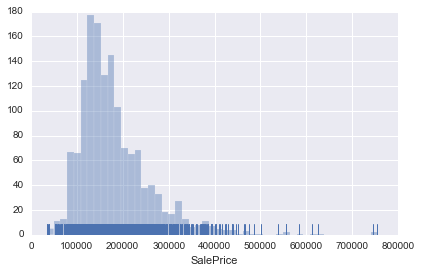

In [10]:
# Explore data
sns.distplot(df['SalePrice'], kde=False, rug=True)
df['SalePrice'].describe()

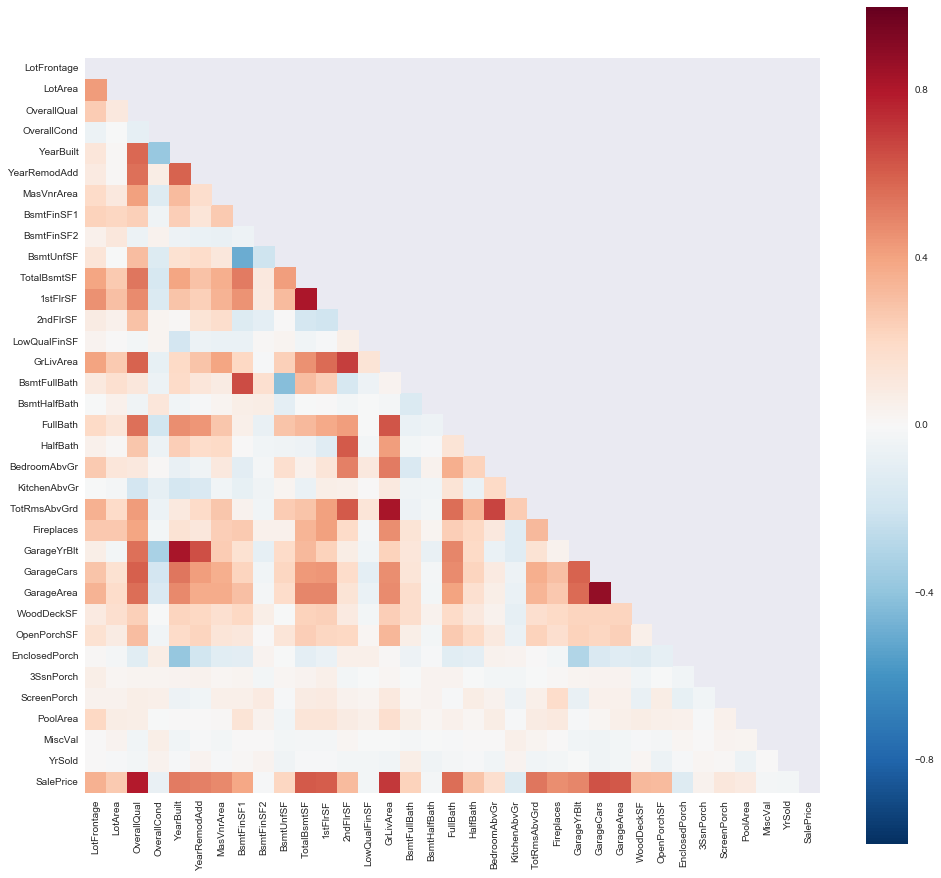

In [11]:
corr = df.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
# TODO: sort by correlation with SalesPrice
plt.figure(figsize=(15, 15))
mask = np.triu(np.ones(corr.values.shape)).astype(np.bool)
sns.heatmap(corr, vmin=-1, vmax=1, square=True, mask=mask)

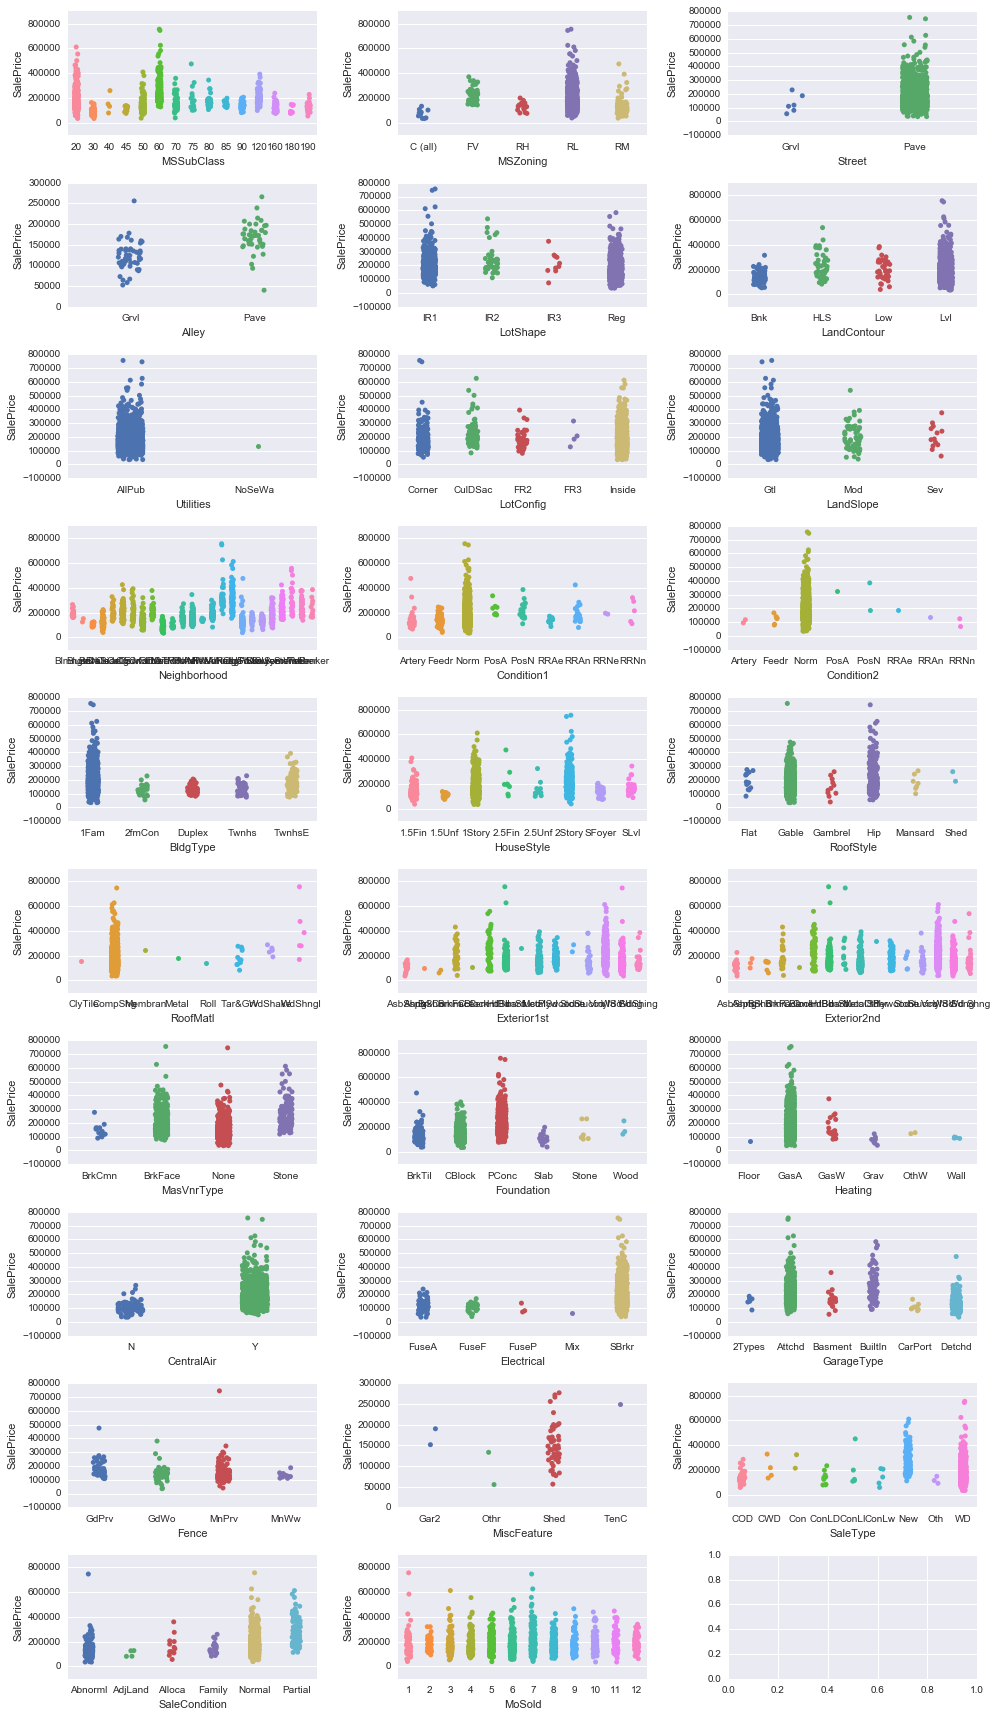

In [4]:
#cat = df[cols_cat[0]]
#cat.head()
#cat_num.info()
#sns.swarmplot(x=df[cols_cat[0]])
#sns.set_palette(sns.cubehelix_palette(n_colors=15, start=.5, rot=-.75))
#sns.set_palette(sns.choose_colorbrewer_palette('sequential'))
#sns.set_style('white')
#sns.swarmplot(x='MSSubClass', y='SalePrice', data=df)
#sns.stripplot(x='MSSubClass', y='SalePrice', data=df, jitter=True)

fig, axs = plt.subplots(int(np.ceil(len(cols_cat)/3.0)), 3, figsize=(14, 24))
for i, name in enumerate(cols_cat):
    ix = np.unravel_index(i, axs.shape)
    #print ix, name
    sns.stripplot(x=name, y='SalePrice', data=df, jitter=True, ax=axs[ix])
sns.despine()
plt.tight_layout()

#melted = pd.melt(cat_num.reset_index(), value_vars=cols_cat_num, value_name='value')
#melted = melted.set_index('variable', append=True).sort_index()
#melted.head()
#grouped = melted.groupby('variable', axis=0)
#grouped.groups.keys()
#sns.swarmplot(x='value', data=melted['ExterCond'])

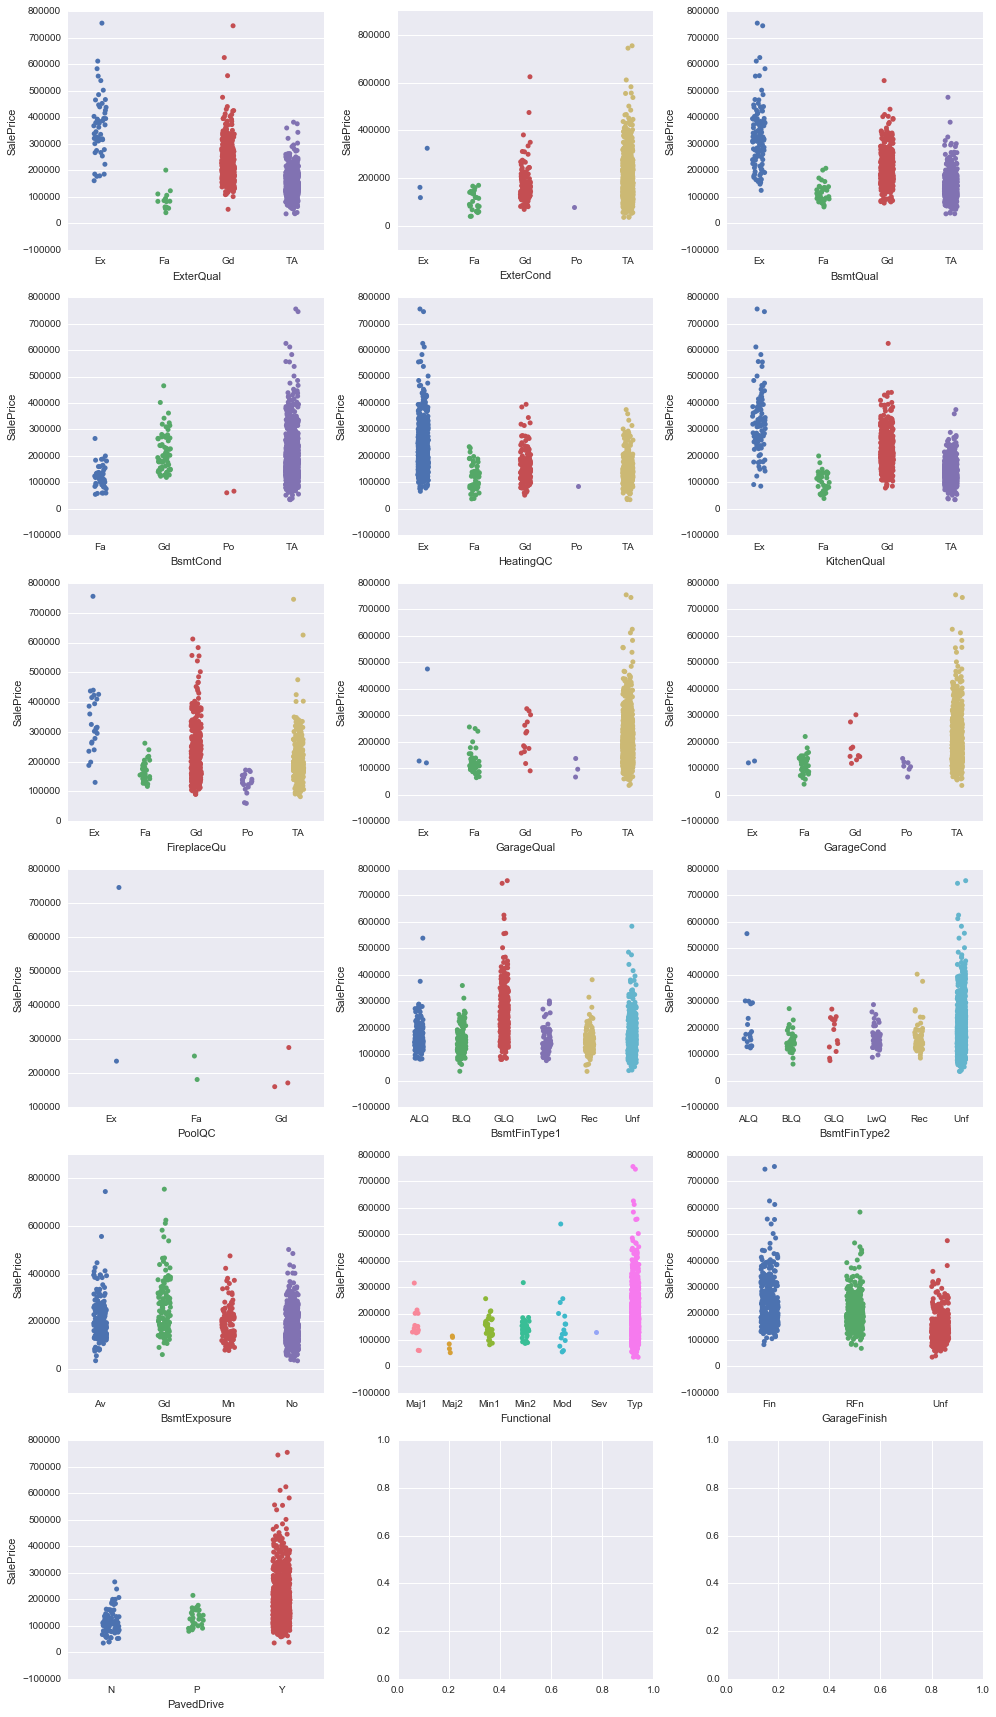

In [6]:
fig, axs = plt.subplots(int(np.ceil(len(cols_cat_ord)/3.0)), 3, figsize=(14, 24))
for i, name in enumerate(cols_cat_ord):
    ix = np.unravel_index(i, axs.shape)
    #print ix, name
    sns.stripplot(x=name, y='SalePrice', data=df, jitter=True, ax=axs[ix])
sns.despine()
plt.tight_layout()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
LotArea         1460 non-null int64
OverallQual     1460 non-null int64
OverallCond     1460 non-null int64
YearBuilt       1460 non-null int64
YearRemodAdd    1460 non-null int64
ExterQual       1460 non-null int64
ExterCond       1460 non-null int64
dtypes: int64(7)
memory usage: 79.9 KB
mapping diag


TypeError: hist() got multiple values for keyword argument 'color'

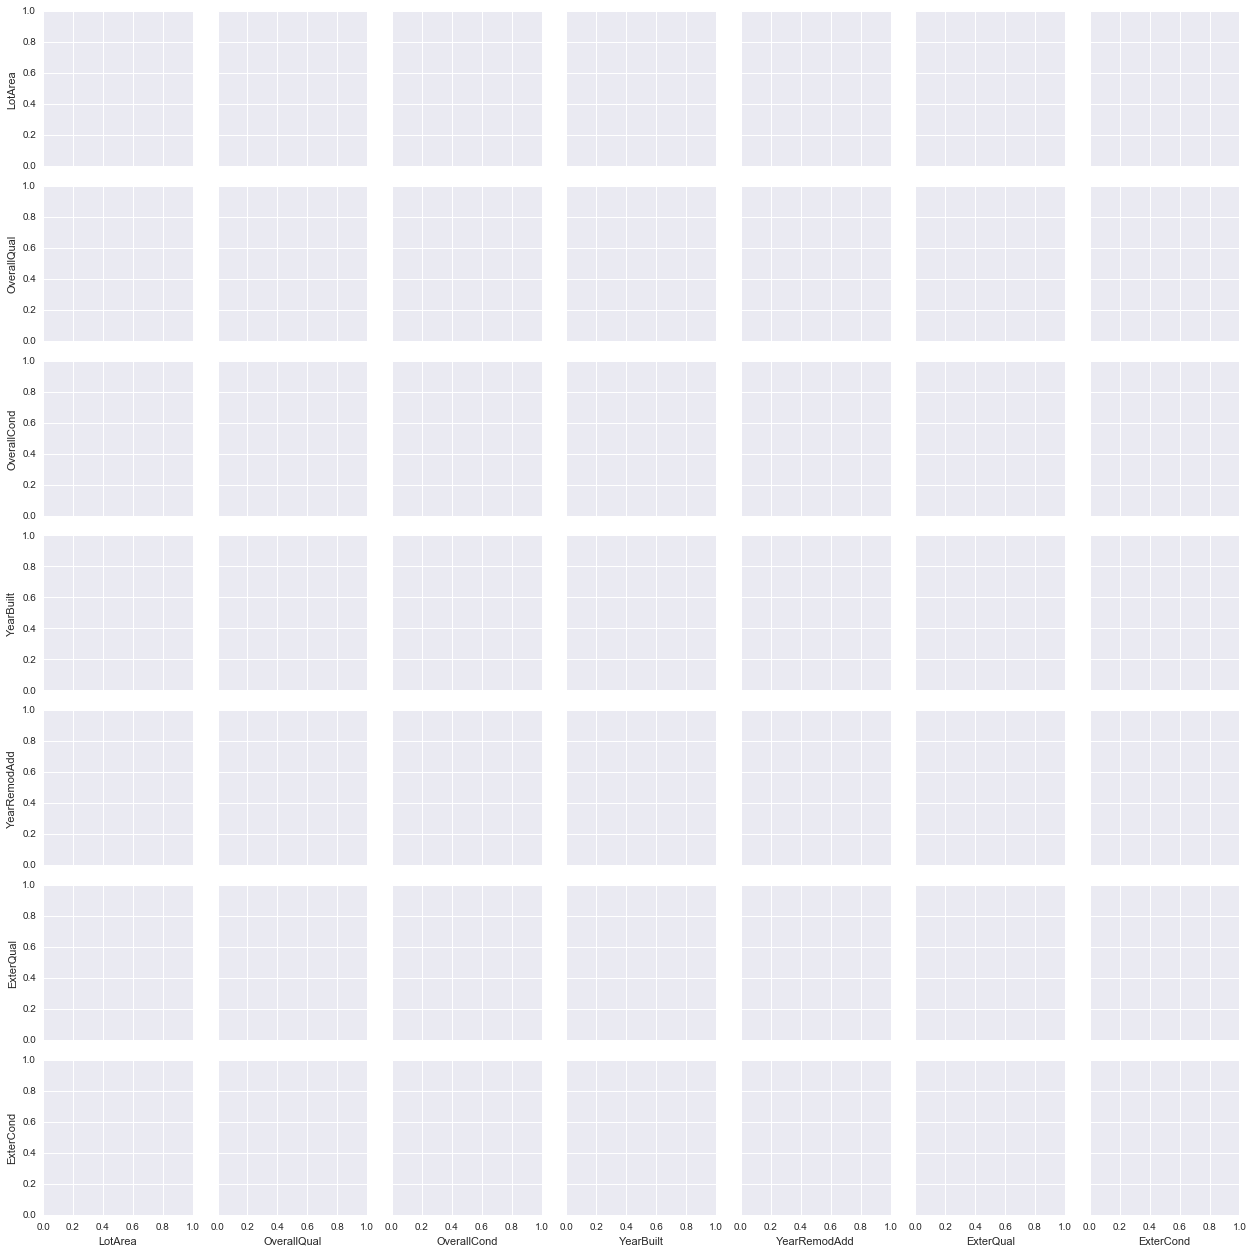

In [40]:
#corr = df.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
numeric = df.select_dtypes(include=['int64'])
del numeric['Id']
numeric = numeric.drop(numeric.columns[[i for i in range(7, numeric.shape[-1])]], axis=1)  # df.columns is zero-based pd.Index
numeric.info()

#extercond = numeric['ExterCond'].dropna()
#sns.distplot(extercond, rug=True, hist=False)
#n, bins, patches = plt.hist(extercond, bins=6, range=(0, 6), align='left')


#nr = int(np.ceil(np.sqrt(numeric.shape[-1])))
#fig, axs = plt.subplots(nr, nr, figsize=(14, 14))
#for i, name in enumerate(numeric):
#    ix = np.unravel_index(i, axs.shape)
#    print ix, name
#    sns.distplot(df[name].dropna(), kde=False, ax=axs[ix])
g = sns.PairGrid(numeric)
print g
print 'mapping diag'
#g.map_diag(lambda x, **kwargs: sns.distplot(x.dropna(), kde=False, **kwargs))
g.map_diag(plt.hist, color=colors.cnames['orange'])
print 'mapping lower'
g.map_lower(plt.scatter)
print 'mapping upper'
g.map_upper(lambda *args, **kwargs: None)